In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

sys.path.append('./src')

import mplot as mp  # See mplot.py in the current directory

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH

# GitHub directories
DATA_DIR = './data'
SIMULATION_DIR = './data/simulation'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'
LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'
JOB_DIR = './jobs'
FIG_DIR = './figures'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [2]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
reload()

In [3]:
SH.METHODS

['True', 'dxdx', 'Lolipop', 'Evoracle', 'LB', 'SL']

In [4]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [5]:
resetPlottingParams()

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

## Figures and data analysis

<a id='fig1'></a>

### Figure 1. Method overview

In [7]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
simulation = SH.load_simulation(params, 6)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

CPU times: user 4.8 s, sys: 42.4 ms, total: 4.85 s
Wall time: 4.87 s


In [14]:
reload()
FIG.save_subfigure_for_method_overview(reconstruction, save_file_prefix='./figures/subfigures/0-horizontal')

### Figure 2. Clade competition is accurately reconstructed from simulated allele frequency trajectories. 

In [8]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

CPU times: user 5.77 s, sys: 54.5 ms, total: 5.82 s
Wall time: 5.84 s


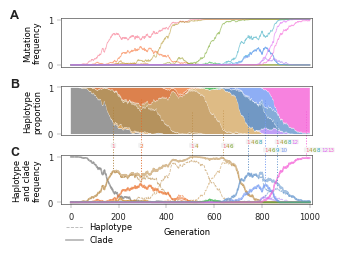

In [137]:
reload()
FIG.plot_figure_reconstruction_example(simulation, reconstruction, 
    annotate_together=True, plot_single_column=True, 
    plot_dot_for_WT_locus=False, add_background_behind_annotation=True,
    annotation_ys=[1.22] * 4 + [1.3, 1.12, 1.3, 1.12],
    genotype_color_indices_to_skip=[7, 8, 9],
    save_file=FIG_DIR + "/fig-reconstruction-example.pdf")


<a id='fig2'></a>

### Figure 3. Covariance and fitness values are accurately inferred from simulated allele frequency trajectories. 

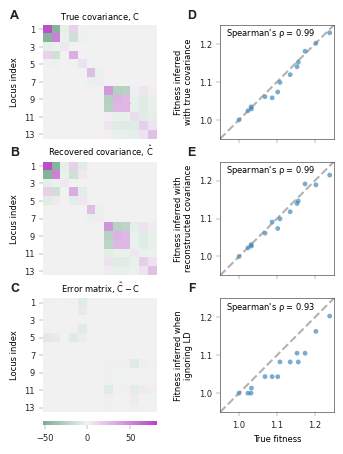

In [83]:
reload()
FIG.plot_figure_performance_example(simulation, reconstruction, evaluation,
    save_file=FIG_DIR + "/fig-perf-example-new.pdf")

<a id='fig3'></a>

### Figure 4. Performance benchmarking on simulated data.

In [11]:
%%time
reload()
(MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
 Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
 Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)


Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 6.79 s, sys: 205 ms, total: 7 s
Wall time: 7.24 s


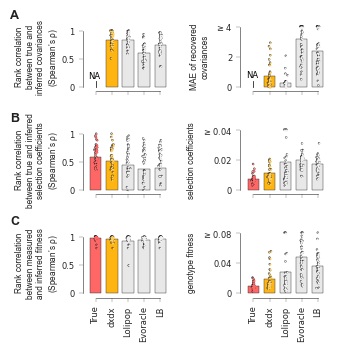

In [125]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
    two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
    save_file=FIG_DIR + "/fig-perf-sim-true-new.pdf")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


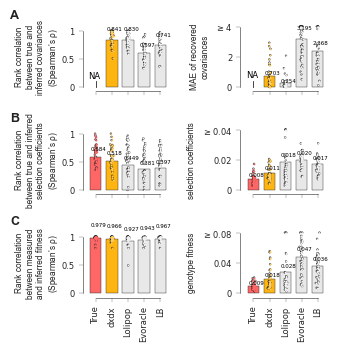

posx and posy should be finite values
posx and posy should be finite values


In [34]:
# reload()
# FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#     Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#     MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#     two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#     annot=True,
#     save_file=FIG_DIR + "/fig-perf-sim-true-new-annot.pdf")

<a id='fig4'></a>

### Figure 5.  An overview of clusterization results on the LTEE data.

In [31]:
%%time
reload()
pop = 'p3'
rec_0_70 = LH.reconstruct_for_a_period(pop, 0, 70, debug=False, verbose=False, plot=False)
rec_70_122 = LH.reconstruct_for_a_period(pop, 70, 122, debug=False, verbose=False, plot=False)

CPU times: user 30.3 s, sys: 1.19 s, total: 31.5 s
Wall time: 31.9 s


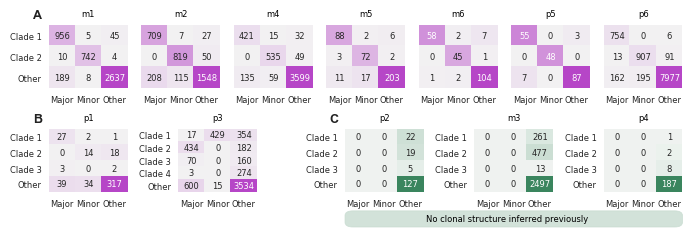

In [41]:
reload()
FIG.plot_figure_identities_LTEE(LH.populations, 
    reconstructions, LH.data, rec1=rec_0_70, rec2=rec_70_122,
    save_file=FIG_DIR + "/fig-identities-LTEE-with-horizontal-text-new-p3-two-periods.pdf")

### Figure 6.  Reconstruction on population m6 of the LTEE data is nearly identical with previous results. 

In [7]:
%%time
LH.loadData(LH.populations)

CPU times: user 1min 5s, sys: 1.43 s, total: 1min 6s
Wall time: 1min 6s


In [9]:
%%time
reload()
populations = [pop for pop in LH.populations if pop !='p6']
reconstructions = LH.load_reconstructions_for_LTEE(populations, with_cov=True)
reconstructions.update(LH.load_reconstructions_for_LTEE(["p6"]))

CPU times: user 395 ms, sys: 1.56 s, total: 1.96 s
Wall time: 2.19 s


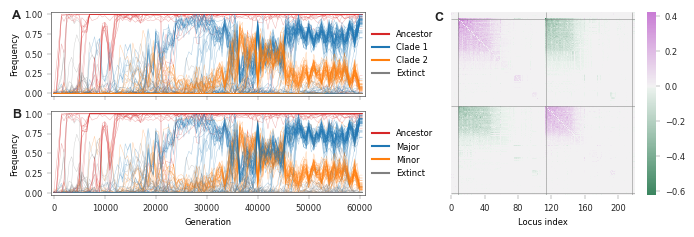

In [81]:
reload()
pop = 'm6'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.4, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-new.pdf")

<a id='fig5'></a>

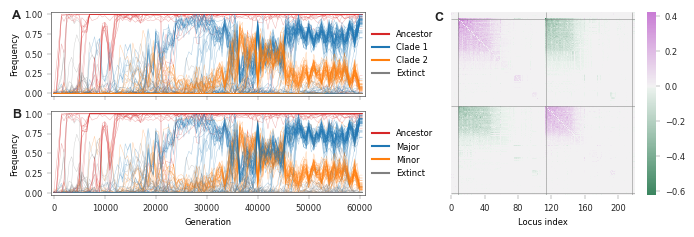

In [99]:
# reload()
# pop = 'm6'
# FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
#     LH.data, alpha=0.4, 
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE.svg")

### Figure 7.  Reconstruction on population m3 of the LTEE data revealed clonal interference not found in previous results. 

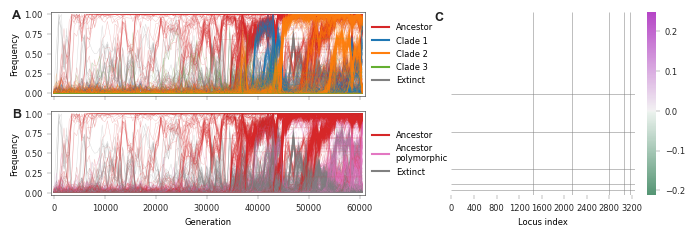

In [80]:
reload()
pop = 'm3'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.3,
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-nonclonal-new.pdf")

<a id='fig6'></a>

<a id='fig7'></a>

### Figure 8.  Reconstruction on data from ***Harris, K. B., Flynn, K. M. & Cooper, V. S. Polygenic Adaptation and Clonal Interference Enable Sustained Diversity in Experimental Pseudomonas aeruginosa Populations. Mol. Biol. Evol. 38, 5359–5375 (2021)***

In [37]:
%%time
reload()
trajectories = PALTEanalysis.parse_trajectories()
measured_fitness = PALTEanalysis.parse_measured_fitness()

reconstructions_PALTE, evaluations_PALTE, inferences_PALTE = PALTEanalysis.parse_reconstructions(assumeCooperationAmongSharedMuts=True)

intCov_lolipop_PALTE, selection_lolipop_PALTE, fitness_lolipop_PALTE = PALTEanalysis.parse_Lolipop_results()

intCov_evoracle_PALTE, selection_evoracle_PALTE, fitness_evoracle_PALTE = PALTEanalysis.parse_evoracle_results()

inferred_fitness_list = PALTEanalysis.parse_inferred_fitness_list(inferences_PALTE, fitness_lolipop_PALTE, fitness_evoracle_PALTE)


4
4


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4
4
4
4
CPU times: user 45.3 s, sys: 11 s, total: 56.3 s
Wall time: 17 s


[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9642857142857145, 0.6785714285714287, nan, 0.9285714285714288]


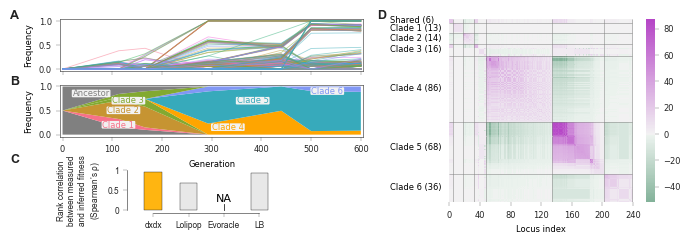

In [115]:
reload()
pop = 'B1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
    save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}-new.pdf")

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9642857142857145, 0.6785714285714287, nan, 0.9285714285714288]


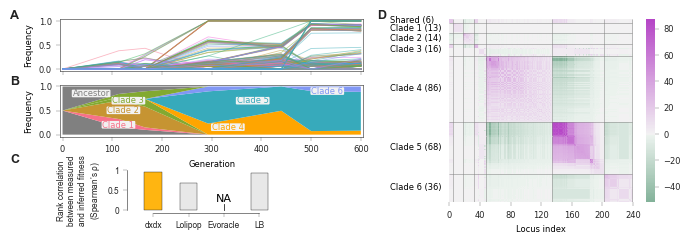

In [38]:
# reload()
# pop = 'B1'
# FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
#     reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}-new-assumeCoopAmongSharedMuts.pdf")

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


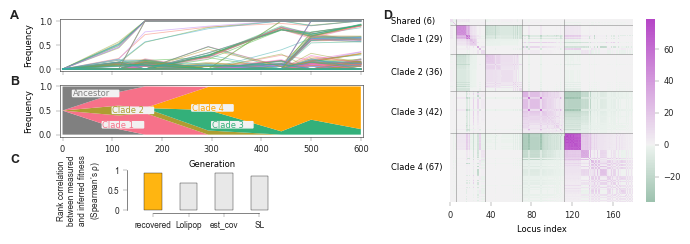

In [102]:
reload()
pop = 'B2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


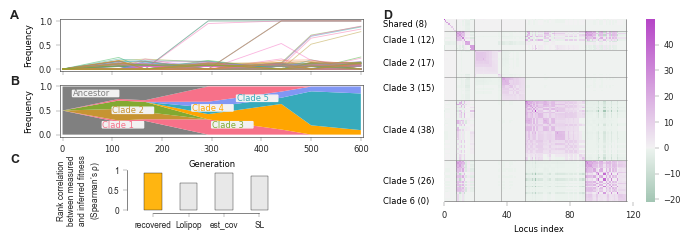

In [103]:
reload()
pop = 'B3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


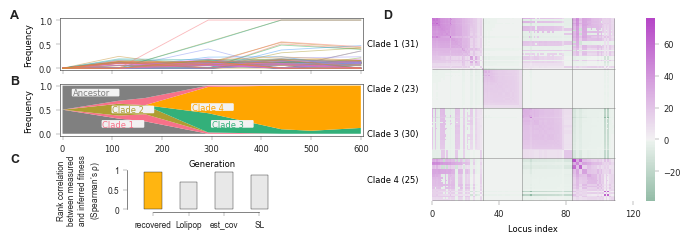

In [104]:
reload()
pop = 'P1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


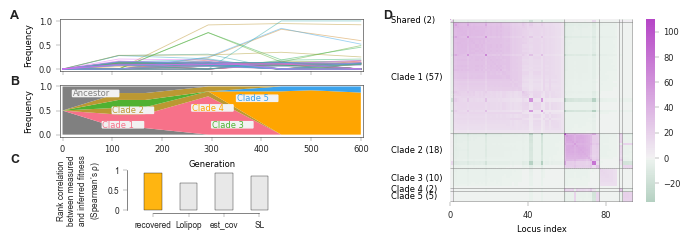

In [105]:
reload()
pop = 'P2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


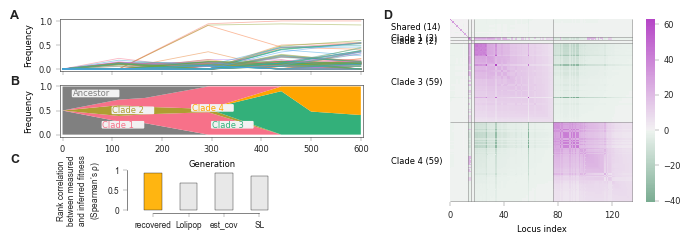

In [106]:
reload()
pop = 'P3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

<a id='supp-fig1'></a>

### Supplementary Figure 1. Merging results from two successive competition periods.
Subfigures are created here and combined in ./figures/paper-clonal-structure-merge-periods-figure.pptx

In [15]:
reload()
params = SH.Params()  # Default parameters for simulation
simulation = SH.load_simulation(params, 6)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

In [16]:
print(reconstruction.periodBoundaries)
print(reconstruction.refinedPeriodBoundaries)

[(0, 706), (705, 1001)]
[(0, 508), (508, 1001)]


In [19]:
reload()
reconstruction = SH.load_reconstruction_for_a_simulation(params, 6)
FIG.save_subfigure_for_merge_periods(reconstruction, save_file_prefix='./figures/subfigures/6-merge-periods')

(508, 2) 4 6
(493, 4) 6 6


In [20]:
reload()
reconstruction = SH.load_reconstruction_for_a_simulation(params, 28)
FIG.save_subfigure_for_merge_periods(reconstruction, save_file_prefix='./figures/subfigures/28-merge-periods')

(681, 2) 4 6
(320, 2) 6 6


### Supplementary Figure 2. Reconstruction for population p3 of LTEE data

In [103]:
%%time
reload()
pop = 'p3'
rec_0_70 = LH.reconstruct_for_a_period(pop, 0, 70, debug=False, verbose=False, plot=False)
rec_70_122 = LH.reconstruct_for_a_period(pop, 70, 122, debug=False, verbose=False, plot=False)

CPU times: user 29.6 s, sys: 1.06 s, total: 30.7 s
Wall time: 30.8 s


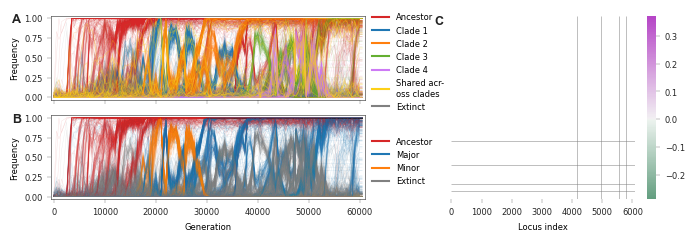

In [111]:
reload()
pop = 'p3'
FIG.plot_figure_reconstruction_example_LTEE_two_periods(pop, rec_0_70, rec_70_122, LH.data,
    directory=CLUSTERIZATION_OUTPUT_DIR,
    alpha=0.15,
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-two-periods.pdf")

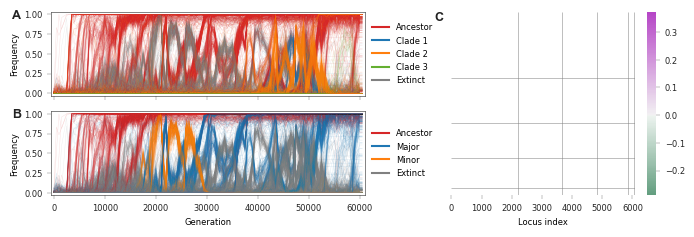

In [102]:
# reload()
# pop = 'p3'
# FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
#     LH.data, alpha=0.15,
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-one-period.pdf")

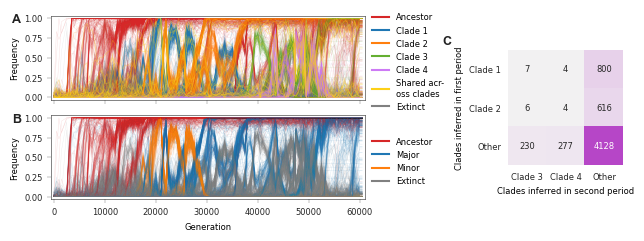

In [128]:
# reload()
# pop = 'p3'
# FIG.plot_figure_reconstruction_example_LTEE_two_periods_alternative(pop, rec_0_70, rec_70_122, LH.data,
#     directory=CLUSTERIZATION_OUTPUT_DIR,
#     alpha=0.15,
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-two-periods-alt.pdf")

### Supplementary Figure 3. Reconstruction on data from ***Scribner, M. R., Santos-Lopez, A., Marshall, C. W., Deitrick, C. & Cooper, V. S. Parallel Evolution of Tobramycin Resistance across Species and Environments. MBio 11, (2020)***

In [35]:
%%time
reload()
tobramycin_analysis.load_df_traj()
intCov_lolipop_TOB, selection_lolipop_TOB, fitness_lolipop_TOB = tobramycin_analysis.parse_Lolipop_results()
intCov_evoracle_TOB, selection_evoracle_TOB, fitness_evoracle_TOB = tobramycin_analysis.parse_evoracle_results()
reconstructions_TOB, evaluations_TOB, inferences_TOB = tobramycin_analysis.parse_reconstructions(assumeCooperationAmongSharedMuts=True)
measured_MIC_list = tobramycin_analysis.parse_measured_MIC_list()
median_inferred_fitness_lists = tobramycin_analysis.parse_median_inferred_fitness_list_of_methods(inferences_TOB, 
    selection_lolipop_TOB, selection_evoracle_TOB)



CPU times: user 204 ms, sys: 36.4 ms, total: 240 ms
Wall time: 279 ms


In [118]:
print('Measured MIC:', measured_MIC_list)
print('Evoracle:', ['%.2f'%_ for _ in median_inferred_fitness_lists[tobramycin_analysis.METHODS.index('Evoracle')]])
print('Lolipop:', ['%.2f'%_ for _ in median_inferred_fitness_lists[tobramycin_analysis.METHODS.index('Lolipop')]])


Measured MIC: [0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
Evoracle: ['1.00', '1.27', '1.05', '1.20', '1.25', '1.25', '1.30', '1.85']
Lolipop: ['1.00', '1.09', '1.00', '1.06', '1.06', '1.07', '1.07', '1.24']


[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
[0.7165410061057312, 0.5312286769404558, 0.7165410061057312, 0.2470831055537004]


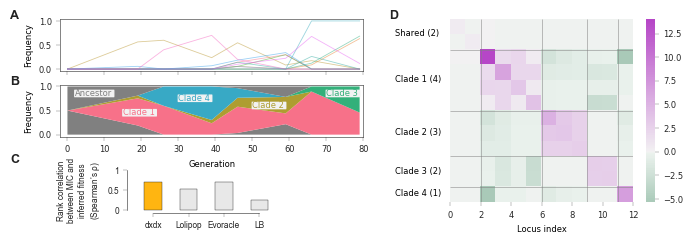

In [120]:
reload()
medium, rpl = 'Planktonic', 1
FIG.plot_figure_performance_on_data_tobramycin(tobramycin_analysis.traj_pa[medium][rpl][0], 
    reconstructions_TOB[medium][rpl], measured_MIC_list, median_inferred_fitness_lists,
    save_file=FIG_DIR + f"/fig-perf-tobramycin-{medium}-{rpl+1}-new.pdf")

[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
[0.7165410061057312, 0.5312286769404558, 0.7165410061057312, 0.2470831055537004]


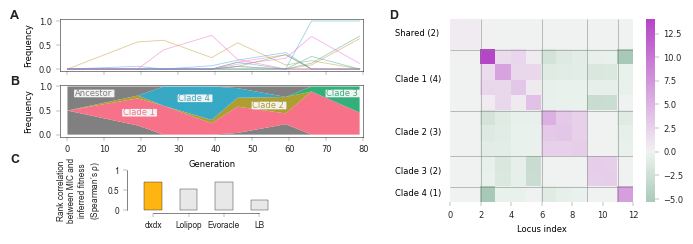

In [36]:
# reload()
# medium, rpl = 'Planktonic', 1
# FIG.plot_figure_performance_on_data_tobramycin(tobramycin_analysis.traj_pa[medium][rpl][0], 
#     reconstructions_TOB[medium][rpl], measured_MIC_list, median_inferred_fitness_lists,
#     save_file=FIG_DIR + f"/fig-perf-tobramycin-{medium}-{rpl+1}-new-assumeCoopAmongSharedMuts.pdf")

### Supplementary Figure 4. Compare run time of different methods on LTEE data

In [86]:
reload()
num_alleles_sorted, run_time = LH.get_all_methods_run_time()

                 p2    p4    p5    m6    m5    p1    m3    m2    m1    m4    p3     p6
num_alleles     174   201   202   221   406   466  3255  3488  4597  4872  6102  10134
recovered (h)  0.01  0.01  0.01  0.01  0.02  0.02  0.62  0.52  0.95  1.64  1.69      3
Lolipop (h)    0.18  0.22  0.24   0.4  1.39  1.68   nan   nan   nan   nan   nan    nan
Evoracle (h)   2.55  3.12  3.85  3.98  5.45  6.36   nan   nan   nan   nan   nan    nan


In [12]:
reload()
num_alleles_sorted, run_time = LH.get_all_methods_run_time()

                 p2    p4    p5    m6    m5    p1    m3    m2    m1    m4    p3     p6
num_alleles     174   201   202   221   406   466  3255  3488  4597  4872  6102  10134
recovered (h)  0.02  0.02  0.01  0.02  0.05  0.03  2.29  2.46  1.91  2.17  3.08   6.79
Lolipop (h)    0.18  0.22  0.24   0.4  1.39  1.68   nan   nan   nan   nan   nan    nan
Evoracle (h)   2.55  3.12  3.85  3.98  5.45  6.36   nan   nan   nan   nan   nan    nan


method=dxdx, slope=1.475, intercept=-5.407, rvalue=0.993, pvalue=0.000


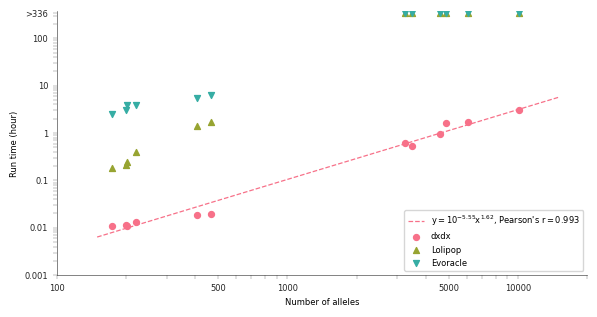

In [88]:
reload()
FIG.plot_figure_runtime_LTEE(LH.populations_sorted_by_num_alleles, num_alleles_sorted, run_time, 
    save_file=FIG_DIR + f"/fig-LTEE-run-time.pdf")